En la parte de preprocesamiento se limpiará la data para trabajar con los valores que representen de mejor manera la información que queremos y especialmente tener control de los aspectos éticos que pueden estar involucrados.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [195]:
df = pd.read_csv('BankData.csv')
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,1887,20


In [196]:
df.shape

(10127, 16)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_

### Datos Nulos y Duplicados

In [198]:
df.isnull().any(axis=1).value_counts()

False    10127
dtype: int64

In [199]:
df.duplicated().value_counts()

False    10127
dtype: int64

### Análisis de Datos Sesgados
Antes de generar el modelo es importante entender todas las variables. Se observará la existencia de diferentes proporciones en algunas variables, si esto sucede, podríamos tener un problema GIGO (Garbage In, Garbage Out).

Esto es muy importante porque los modelos de Machine Learning ayudan a las personas a tomar decisiones importantes y si el modelo se encuentra sesgado, esto hará que se propague en diferentes áreas de la sociedad!

Proporción de hombres y mujeres:

In [200]:
df['Gender'].value_counts(normalize=True) * 100

F    52.908068
M    47.091932
Name: Gender, dtype: float64

No hay hay diferencias relevantes en este tópico! Eso es bueno.

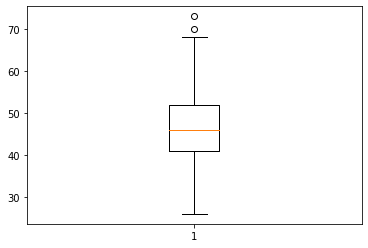

In [201]:
plt.boxplot(df['Customer_Age']);

In [202]:
df['Education_Level'].value_counts(normalize=True) * 100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64

In [203]:
df['Marital_Status'].value_counts(normalize=True) * 100

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64

In [204]:
df['Income_Category'].value_counts(normalize=True) * 100

Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64

In [205]:
df['Card_Category'].value_counts(normalize=True) * 100

Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64

Acá tenemos un claro problema, el 93% de los clientes tiene una tarjeta "Blue", mientras que la proporción de datos de las otras tarjetas se encuentra debajo de 5.5%!

Por qué es un problema? Quizás nuestro modelo prediga que los clientes que tienen la tarjeta "Blue" tienen más probabilidades de dejar el banco, pero eso es solo porque hay más datos de este tipo de clientes!

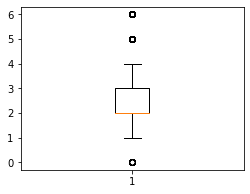

In [206]:
plt.figure(figsize=(4,3))
plt.boxplot(df['Months_Inactive_12_mon']);

In [207]:
mask = (df['Months_Inactive_12_mon'] < 5) & (df['Months_Inactive_12_mon'] > 0.5)
df = df[mask]

In [208]:
df.rename(columns={'Attrition_Flag' : 'Target'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [209]:
(df['Target'].value_counts(normalize=True) * 100)

Existing Customer    84.064924
Attrited Customer    15.935076
Name: Target, dtype: float64

Nuestro objetivo también está desbalanceado. El modelo puede estar sesgado como para determinar si se pierden clientes o no. Podemos manejar esto con las técnicas _oversample_ o _undersample_.

### Manejando variables categóricas

In [210]:
df['CLIENTNUM'] = df['CLIENTNUM'].astype('object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [211]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
count,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.00000,9796.000000,9796.000000,9796.000000
mean,46.249490,2.347591,35.820641,3.812372,2.253471,8670.04266,1165.120661,4403.604226,64.810535
std,8.007974,1.299211,7.935716,1.554888,0.856744,9116.13229,814.043513,3401.885564,23.510293
min,26.000000,0.000000,13.000000,1.000000,1.000000,1438.30000,0.000000,510.000000,10.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2560.00000,424.750000,2148.000000,45.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,4573.00000,1280.000000,3893.500000,67.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,11106.25000,1785.000000,4741.000000,81.000000
max,73.000000,5.000000,56.000000,6.000000,4.000000,34516.00000,2517.000000,17995.000000,139.000000


Separando features y target:

In [212]:
X = df.drop('Target', axis=1)
y = df['Target']

In [213]:
X.nunique().sort_values()

Gender                         2
Marital_Status                 4
Card_Category                  4
Months_Inactive_12_mon         4
Dependent_count                6
Income_Category                6
Total_Relationship_Count       6
Education_Level                7
Months_on_book                44
Customer_Age                  45
Total_Trans_Ct               126
Total_Revolving_Bal         1961
Total_Trans_Amt             4956
Credit_Limit                6074
CLIENTNUM                   9796
dtype: int64

In [214]:
categorical_nom = ['Gender', 'Marital_Status']
categorical_ord = ['Income_Category', 'Education_Level', 'Card_Category']

Trabajando con variables nominales con _one-hot encoding_

In [215]:
X_encoded = pd.get_dummies(X, prefix=['gender', 'marital'], columns=categorical_nom)
X_encoded.head(2)

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,gender_F,gender_M,marital_Divorced,marital_Married,marital_Single,marital_Unknown
0,768805383,45,3,High School,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42,0,1,0,1,0,0
1,818770008,49,5,Graduate,Less than $40K,Blue,44,6,1,8256.0,864,1291,33,1,0,0,0,1,0


Transformando variables ordinales a numéricas

In [216]:
X_encoded[categorical_ord]['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown',
       'Post-Graduate', 'Doctorate', 'College'], dtype=object)

In [217]:
income_dict = {'Unknown' : 0,
               'Less than $40K' : 1,
               '$40K - $60K' : 2,
               '$60K - $80K' : 3,
               '$80K - $120K' : 4,
               '$120K +' : 5
              }

education_dict = {'Unknown' : 0,
                  'Uneducated' : 1,
                  'High School' : 2,
                  'College' : 3,
                  'Graduate' : 4,
                  'Post-Graduate' : 5,
                  'Doctorate' : 6
                 }

card_dict = {'Blue' : 1,
             'Silver' : 2,
             'Gold' : 3,
             'Platinum' : 4
            }

In [218]:
X_encoded['Income_Category'] = X_encoded['Income_Category'].map(income_dict)
X_encoded['Education_Level'] = X_encoded['Education_Level'].map(education_dict)
X_encoded['Card_Category'] = X_encoded['Card_Category'].map(card_dict)

Luego se obtienen todas las features database con valores numéricos

In [219]:
X_encoded.head()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,gender_F,gender_M,marital_Divorced,marital_Married,marital_Single,marital_Unknown
0,768805383,45,3,2,3,1,39,5,1,12691.0,777,1144,42,0,1,0,1,0,0
1,818770008,49,5,4,1,1,44,6,1,8256.0,864,1291,33,1,0,0,0,1,0
2,713982108,51,3,4,4,1,36,4,1,3418.0,0,1887,20,0,1,0,1,0,0
3,769911858,40,4,2,1,1,34,3,4,3313.0,2517,1171,20,1,0,0,0,0,1
4,709106358,40,3,1,3,1,21,5,1,4716.0,0,816,28,0,1,0,1,0,0


In [220]:
target_dict = {'Existing Customer' : 0,
               'Attrited Customer' : 1
              }

y = y.map(target_dict)

In [221]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Target, Length: 9796, dtype: int64

____________

### Guardando

In [222]:
target = pd.DataFrame(y)

In [223]:
df_cleaned = pd.concat([X_encoded, target], axis=1)

In [224]:
df_cleaned.dtypes

CLIENTNUM                    object
Customer_Age                  int64
Dependent_count               int64
Education_Level               int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
gender_F                      uint8
gender_M                      uint8
marital_Divorced              uint8
marital_Married               uint8
marital_Single                uint8
marital_Unknown               uint8
Target                        int64
dtype: object

In [225]:
df_cleaned.head()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,gender_F,gender_M,marital_Divorced,marital_Married,marital_Single,marital_Unknown,Target
0,768805383,45,3,2,3,1,39,5,1,12691.0,777,1144,42,0,1,0,1,0,0,0
1,818770008,49,5,4,1,1,44,6,1,8256.0,864,1291,33,1,0,0,0,1,0,0
2,713982108,51,3,4,4,1,36,4,1,3418.0,0,1887,20,0,1,0,1,0,0,0
3,769911858,40,4,2,1,1,34,3,4,3313.0,2517,1171,20,1,0,0,0,0,1,0
4,709106358,40,3,1,3,1,21,5,1,4716.0,0,816,28,0,1,0,1,0,0,0


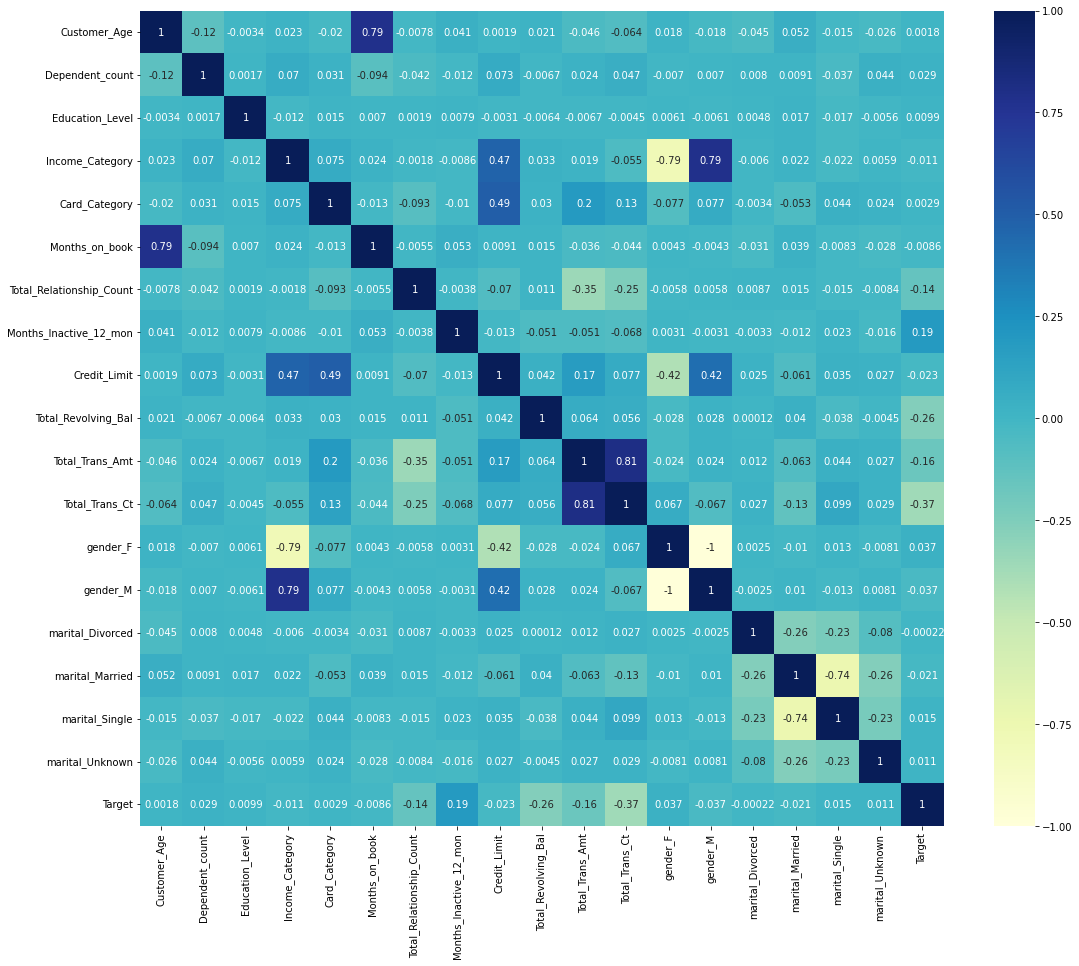

In [226]:
plt.figure(figsize=(18, 15))
sns.heatmap(df_cleaned.corr(), cmap='YlGnBu', annot=True);

En la Matriz de Correlación las variables que mejor explican nuestro objetivo son:

- Total_Trans_Ct
- Total_Trans_Amt 
- Total_Revolving_Bal
- Total_Relationship_Count
- Months_Inactive_12_mon

De todas maneras, es importante elegir las features que son independientes entre ellas. Mirando la matriz podemos ver que Total_Trans_Amt y Total_Trans_Ct tienen 81% de correlación, lo cual es bastante, por lo que escogeremos solo una de ellas, en este caso es mejor seleccionar Total_Trans_Ct porque representa mejor la información objetivo (37% de correlación).

Las demás son independientes, por lo que seleccionamos:

- Total_Trans_Ct
- Total_Revolving_Bal
- Total_Relationship_Count
- Months_Inactive_12_mon

### Selección Automática
Se comparará la selección con una manera automática de analizar las features seleccionadas:

In [227]:
cols = ['Total_Trans_Ct', 
        'Total_Revolving_Bal', 
        'Total_Relationship_Count', 
        'Months_Inactive_12_mon',
        'Target']

In [228]:
df_selected = df_cleaned[cols]

In [229]:
X = df_selected.drop('Target', axis=1)
y = df_selected['Target']

Recordar que la data se encuentra sesgada con respecto a los valores objetivo (80%+ de los valores son clientes existentes).

Se trabajará este problema usando la técnica de oversampling y comparando con el balance original si el modelo tiene mejores resultados o no. Oversample nos ayuda a balancear valores al generar copias de la información con menos líneas.

In [230]:
# Cantidad de valores de clientes existentes
print("Existing Customers")
print((y == 0).value_counts())

Existing Customers
True     8235
False    1561
Name: Target, dtype: int64


In [231]:
#Cuántos valores de clientes existentes necesitamos para obtener una relación de 30-70%
print((8235 / 0.7) - 8235)

3529.2857142857156


In [232]:
ros = RandomOverSampler(sampling_strategy={1: 3530, 0: 8235})

# oversampling
X_ros, y_ros = ros.fit_resample(X, y)

# Revisando el balance
print("---------- Proportion -----------")
print("% Attrited Customers:", len(y_ros[(y_ros == 1)]) / len(y_ros))
print("% Existing Customers: ", len(y_ros[(y_ros == 0)]) / len(y_ros))

---------- Proportion -----------
% Attrited Customers: 0.30004249893752655
% Existing Customers:  0.6999575010624735


In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, ran+
                                                    +dom_state = 42)

Escalamos los datos en cada particion para que todos los datos se muevan en torno a una misma escala de valores. También, lo hacemos por separado y no en todo el dataset para así evitar cualquier tipo de sesgo estadístico, por ende, así trabajamos sólo con los datos que tendremos de entrenamiento y no estaremos obteniendo informacion adicional de los datos de prueba.

In [254]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Modelo DecisionTree

In [255]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics as mt
from IPython.display import Image as PImage

In [256]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [257]:
model_dt.score(X_test_scaled, y_test)

0.8592067988668555

In [258]:
print("score en data de entrenamiento: {:.3f}".format(model_dt.score(X_train_scaled, y_train)))
print("score en data de validacion: {:.3f}".format(model_dt.score(X_test_scaled, y_test)))

score en data de entrenamiento: 0.979
score en data de validacion: 0.859


Tenemos overfitting. Nuestro modelo tiene una performance excelente en nuestro dataset de entrenamiento, sin embargo, no generaliza bien para los datos de testing.

In [259]:
cv = KFold(n_splits=5) # Número deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(X_train))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_leaf=5,
                                             max_depth = depth)
    model = tree_model.fit(X_train_scaled,y_train) 
    valid_acc = model.score(X_test_scaled,y_test) # calculamos la precision con el segmento de validacion
    fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)

# Mostramos los resultados obtenidos
results = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
results = results[["Max Depth", "Average Accuracy"]]
print(results.to_string(index=False))
print("best accuracy: ", max(accuracies))

 Max Depth  Average Accuracy
         1          0.759490
         2          0.824363
         3          0.856941
         4          0.870255
best accuracy:  0.8702549575070821


El árbol obtiene el mejor accuracy al ser entrenado con una profundidad de 4. Probemos con esa configuración.

In [269]:
optimal_tree = DecisionTreeClassifier(max_depth=4)
optimal_tree.fit(X_train_scaled, y_train)
print("--"*12)
print(f'train score: {optimal_tree.score(X_train_scaled, y_train):.4f}')
print(f'test score: {optimal_tree.score(X_test_scaled, y_test):.4f}')

------------------------
train score: 0.8712
test score: 0.8688


Ahora bajó el underfitting, por ende, esta configuración efectivamente fue mejor!

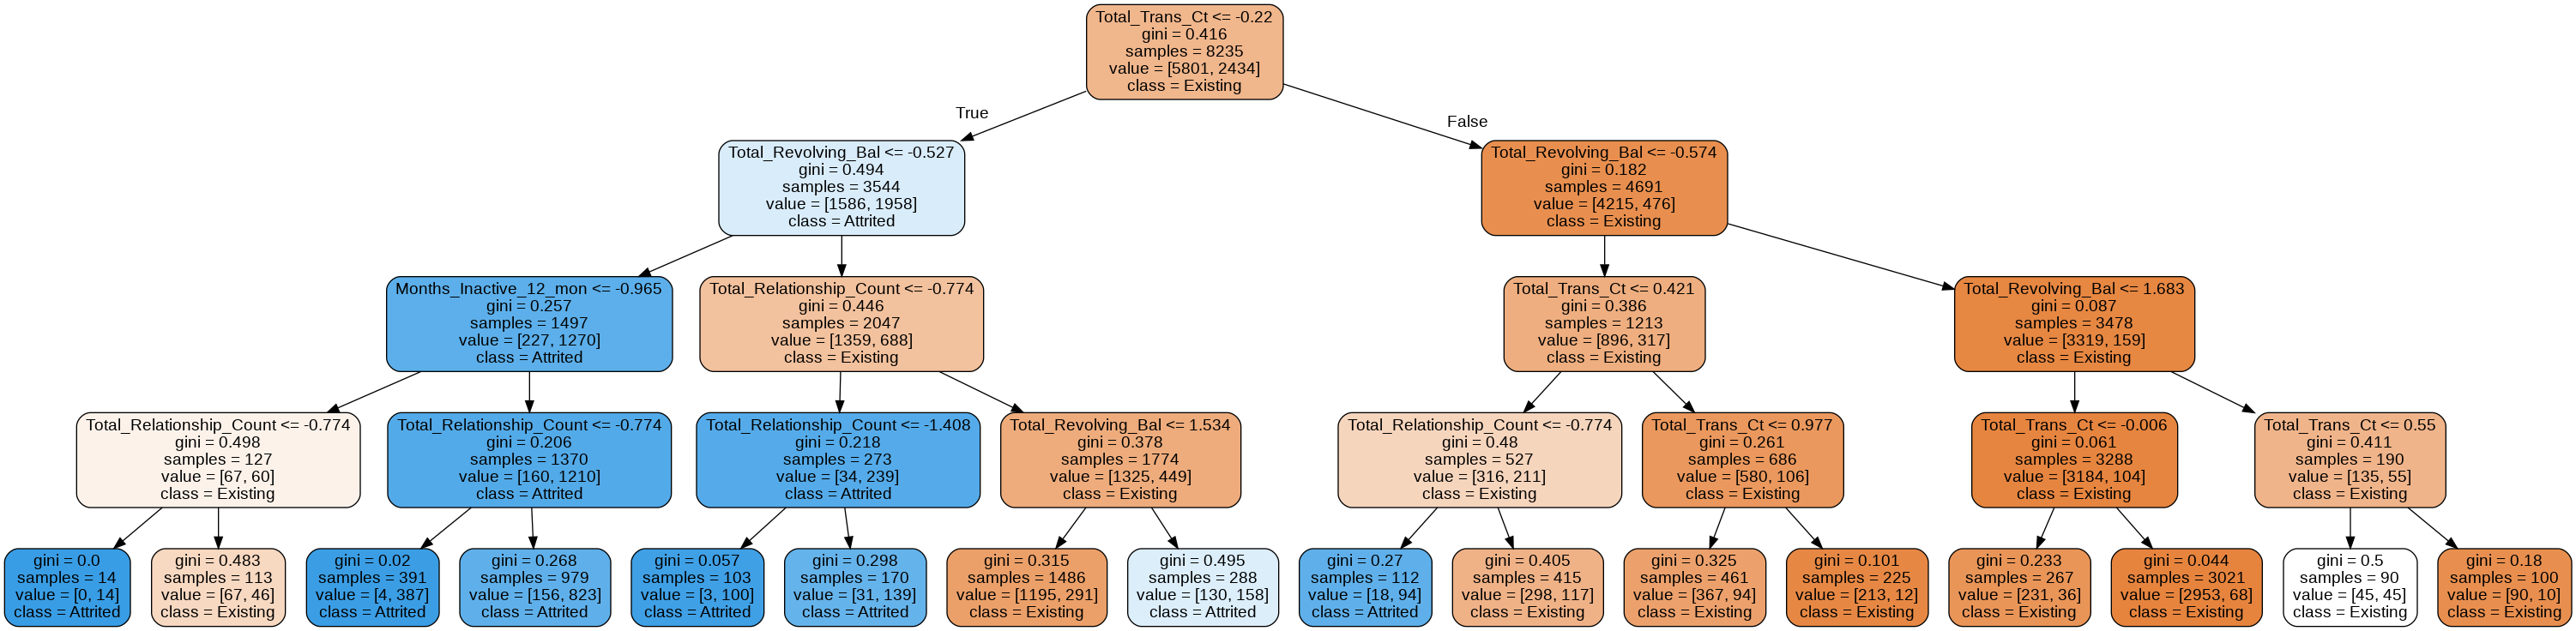

In [270]:
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(optimal_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = True,
                              feature_names = list(X_train.columns),
                              class_names = ["Existing", "Attrited"],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

Veamos cuáles son los features mas importantes segun nuestro modelo

In [271]:
print("----"*4, "feature importance", "----"*4, "\n")
print(optimal_tree.feature_importances_)

---------------- feature importance ---------------- 

[0.48968485 0.34359582 0.14503021 0.02168912]


In [272]:
importance = list(optimal_tree.feature_importances_)
features = list(X.columns)

feature_importance = pd.DataFrame({"feature" : features, "importance" : importance})

# solo nos quedaremos con los features con importancia mayor a 0, ya que a estos prácticamente no los considera
mask = (feature_importance['importance'] != 0)
feature_importance = feature_importance[mask]

In [273]:
# Ordeno los valores para mostrar un mejor gráfico
importance_sorted = feature_importance.sort_values(by='importance', ascending=True)

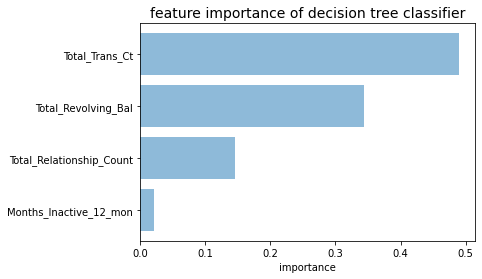

In [274]:
plt.barh(importance_sorted['feature'], importance_sorted['importance'], align='center', alpha=0.5);
plt.title("feature importance of decision tree classifier", size=14);
plt.xlabel("importance");

Estas son las variables mas importantes a la hora de predecir si un cliente abandona o no!

In [275]:
y_pred = optimal_tree.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [276]:
print(classification_report(y_test, y_pred, target_names=["Existing Customer", "Attrited Customer"]))

                   precision    recall  f1-score   support

Existing Customer       0.88      0.94      0.91      2434
Attrited Customer       0.85      0.70      0.77      1096

         accuracy                           0.87      3530
        macro avg       0.86      0.82      0.84      3530
     weighted avg       0.87      0.87      0.87      3530



Nuestro modelo tiene una performance aceptable tanto para predecir clientes existentes como aquellos que abandonan el banco. En concreto, esta última métrica es la que nos importa, saber si un cliente abandona o no, y por lo que podemos ver, tiene peores resultados en las métricas de precision-recall y f1-score, esto es debido al alto desbalance que existe en nuestros datos. Es posible que estas métricas puedan mejorar considerando otra medida o configuración de balanceo de los datos, ya sea un menor oversample, aplicar undersample para reducir la cantidad de datos de clientes existentes, o bien, una combinación de ambas.